In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [3]:
df=data
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [4]:
features = df.columns [:-1].tolist()
print (features)
print(df.shape)

['ID', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
(31647, 18)


In [5]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [6]:
df.tail()

ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
df.nunique().to_frame("No.of unique values")

No.of unique values
ID                        31647
age                          76
job                          12
marital                       3
education                     4
default                       2
balance                    6326
housing                       2
loan                          2
contact                       3
day                          31
month                        12
duration                   1454
campaign                     45
pdays                       509
previous                     38
poutcome                      4
subscribed                    2

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120  

In [12]:
print ("Total Duplicate Rows are", df.duplicated().sum())

Total Duplicate Rows are 0


In [13]:
df.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [14]:
df = df[df["poutcome"] != "unknown"]
df = df[df["poutcome"] != "other"]

In [15]:
df["poutcome"].value_counts()

poutcome
failure    3362
success    1068
Name: count, dtype: int64

In [16]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
3   43962   57  management  divorced   tertiary      no     3287      no   no   
28  30448   45  technician   married  secondary      no      858      no   no   
36  45155   63     retired   married    primary      no     3738      no   no   
41  41042   68     retired   married    primary      no     2301      no   no   
44  42243   32  management   married   tertiary      no     1331      no   no   

      contact  day month  duration  campaign  pdays  previous poutcome  \
3    cellular   22   jun       867         1     84         3  success   
28   cellular    5   feb       617         4    251         2  failure   
36  telephone    9   nov       301         1    456         4  failure   
41   cellular   14   aug        90         3    120         1  failure   
44   cellular   12   nov       126         1     92         5  failure   

   subscribed  
3         yes  
28         no  
36         no  
41         no  
44        yes

In [17]:
df.tail()

ID  age         job   marital  education default  balance housing  \
31582  35298   47    services   married    unknown      no    12839     yes   
31583  42222   53  management   married   tertiary      no     1624      no   
31610  37564   47      admin.   married  secondary      no      120     yes   
31622  44152   79     retired  divorced    primary      no     2787      no   
31645  38556   57  technician   married  secondary      no      225     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31582   no   cellular    7   may        50         1    171         4   
31583   no   cellular   11   nov       166         3     97         7   
31610   no  telephone   14   may        18         6    365        11   
31622   no  telephone   13   jul       617         1    377         1   
31645   no  telephone   15   may        22         7    337        12   

      poutcome subscribed  
31582  failure         no  
31583  success        yes  
31610  failure         no  
31622  success        yes  
31645  failure         no

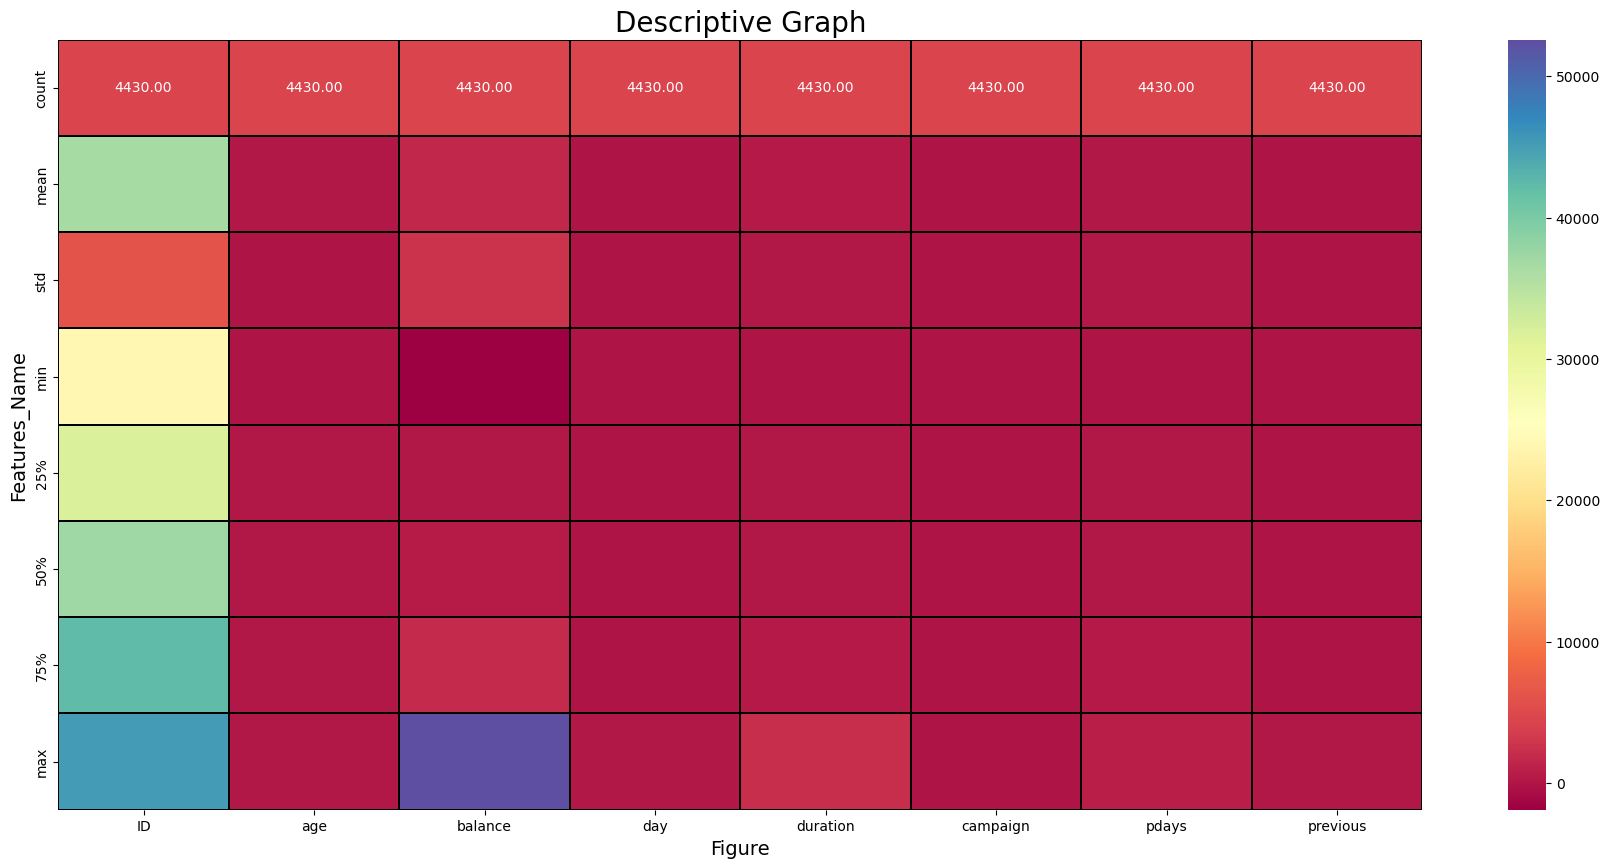

In [18]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

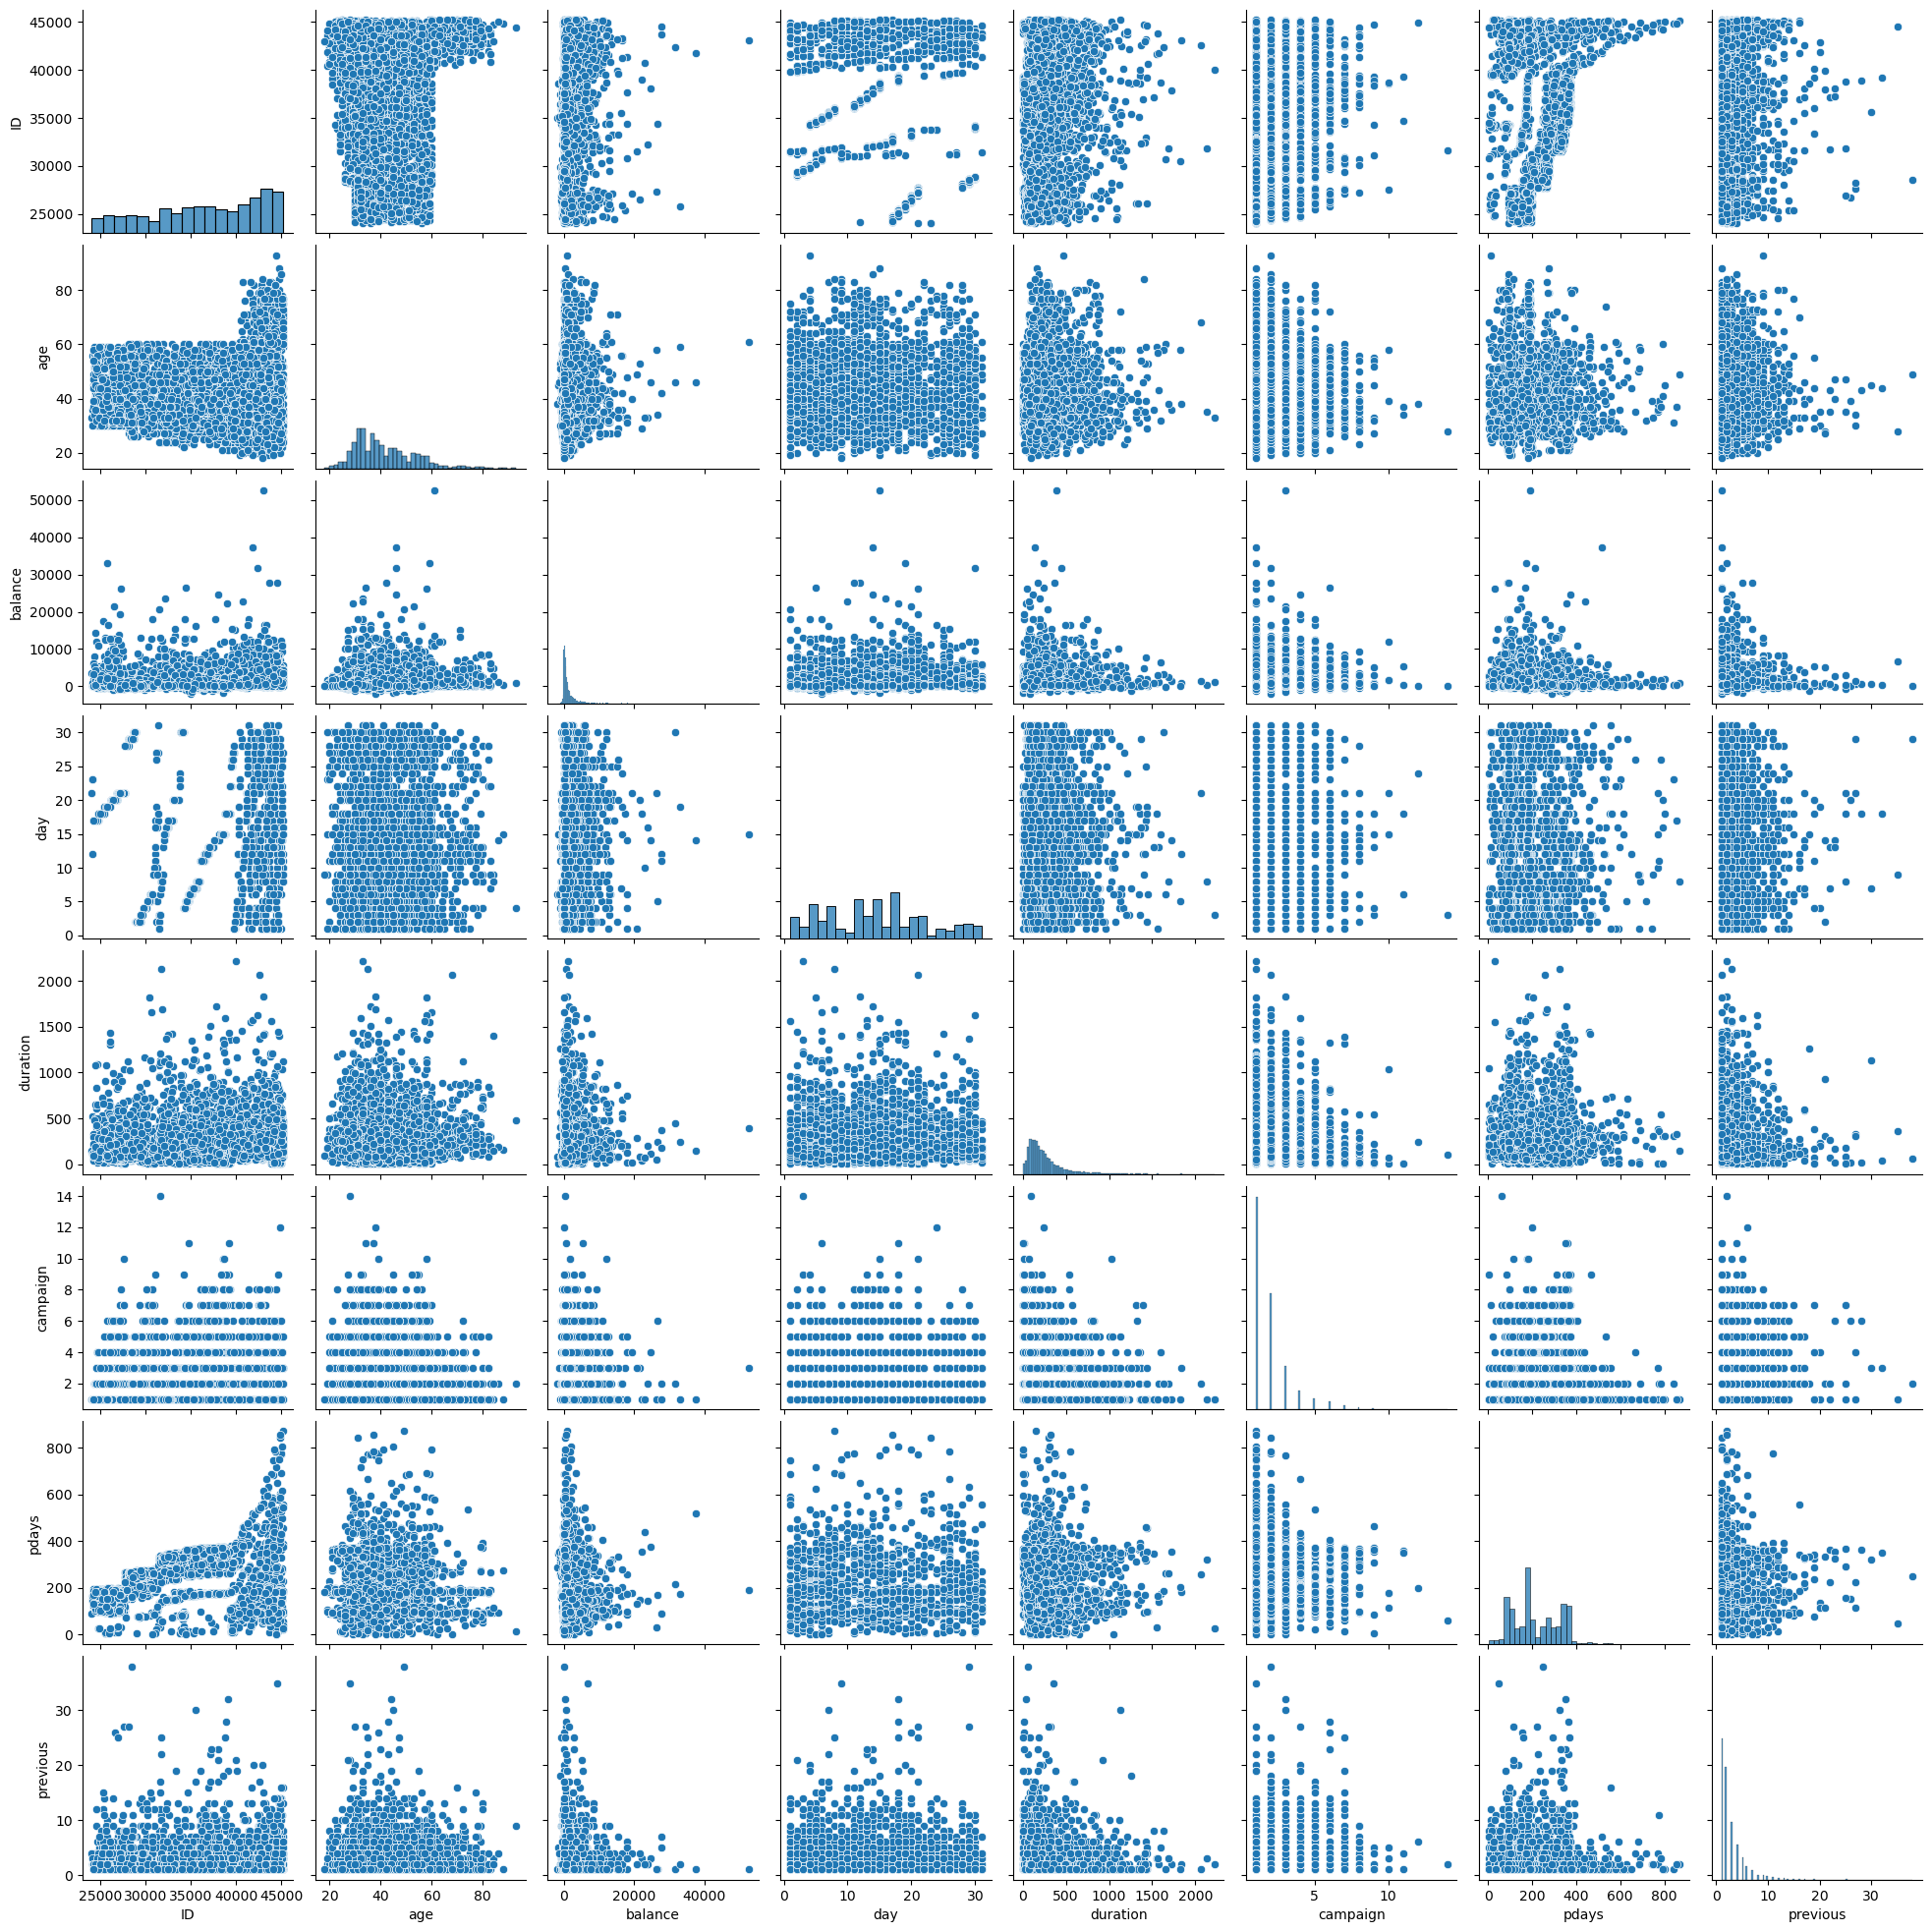

In [19]:
sns.pairplot(data=df, palette= "Dark2")

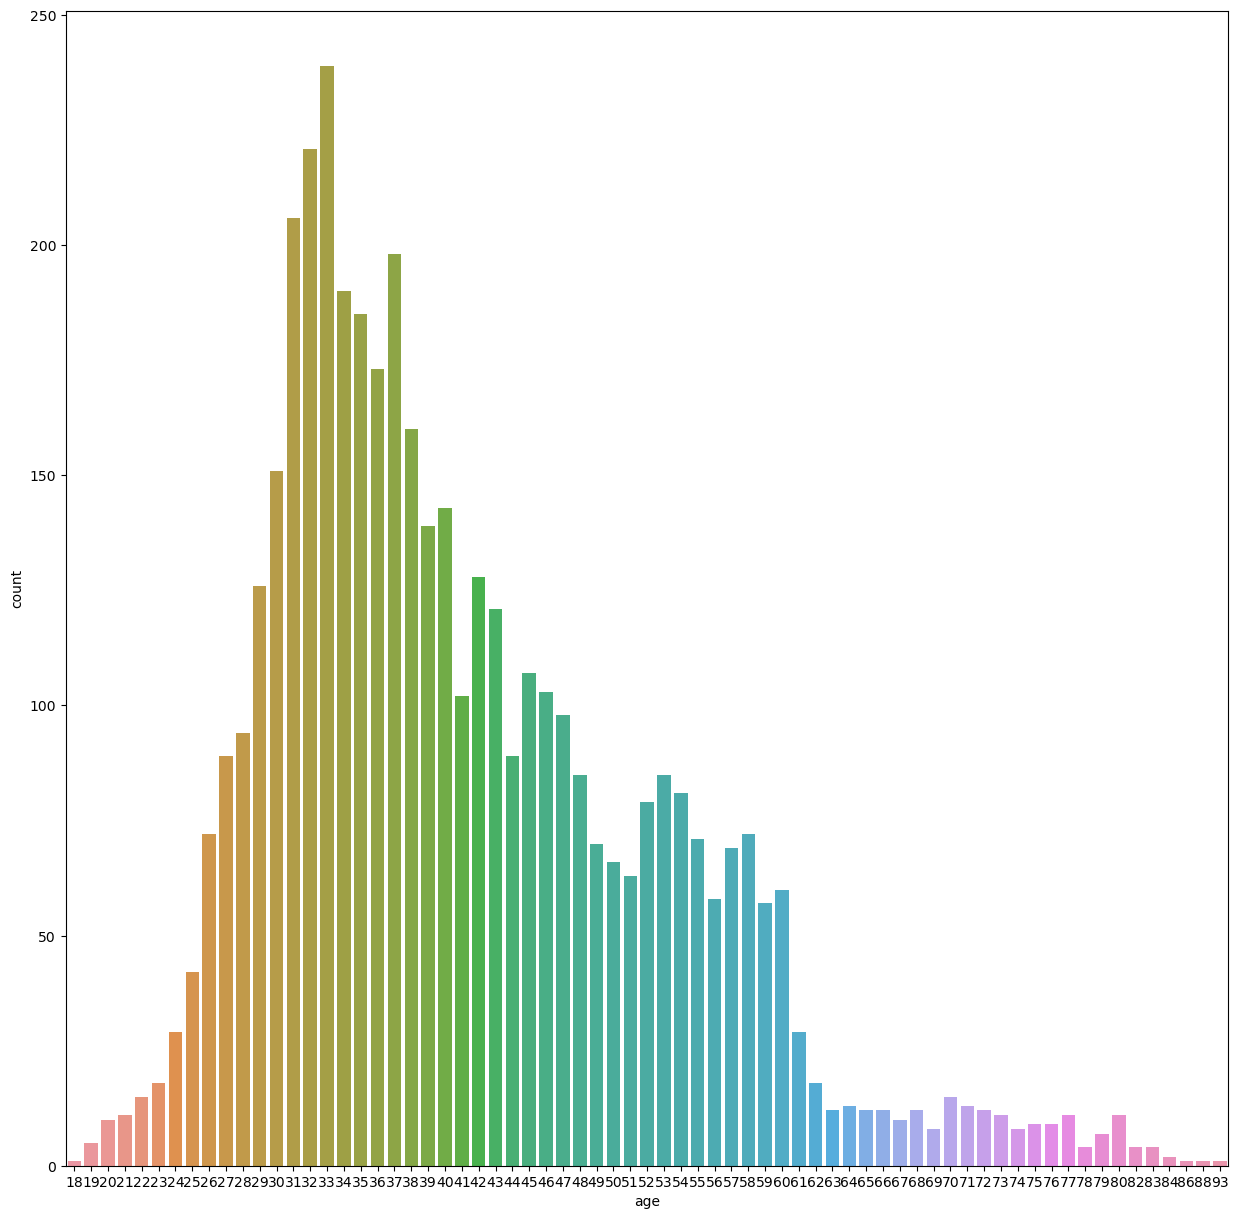

In [20]:
plt.figure(figsize=(15,15))
sns.countplot(x="age",data=df)
plt.show()

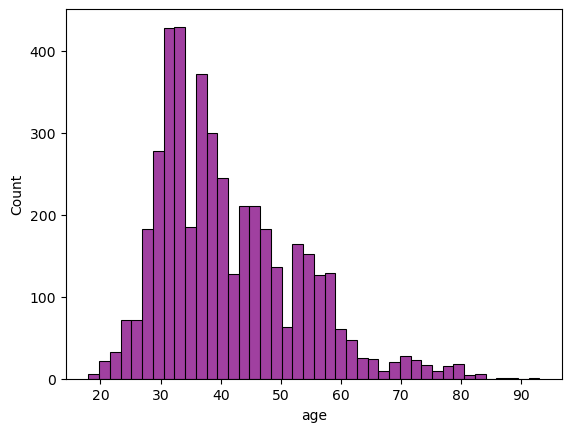

In [21]:
sns.histplot(data=df, x="age",color="purple")
plt.show()

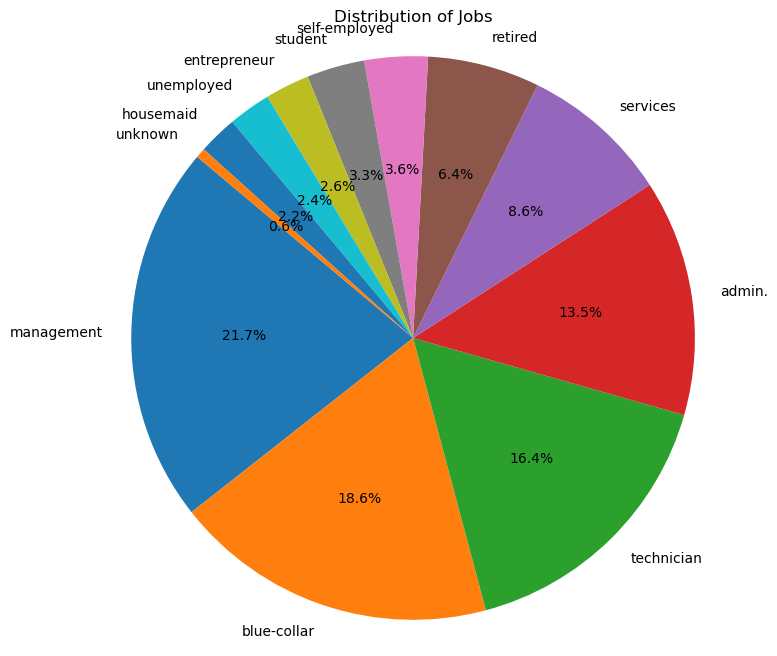

In [22]:
job_counts = df['job'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Jobs')
plt.axis('equal')  
plt.show()

In [23]:
df["marital"].value_counts()

marital
married     2567
single      1375
divorced     488
Name: count, dtype: int64

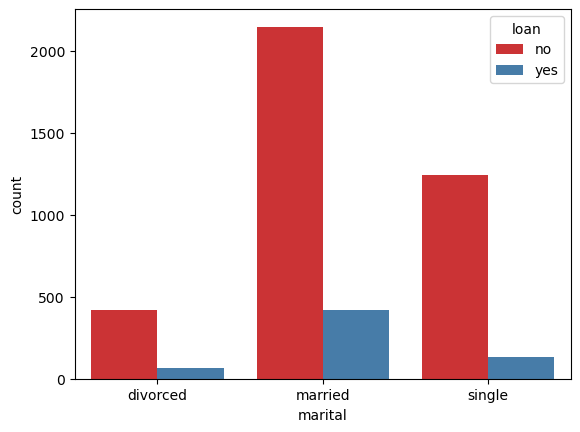

In [24]:
sns.countplot(x="marital",data=df,palette="Set1",hue="loan")
plt.show()

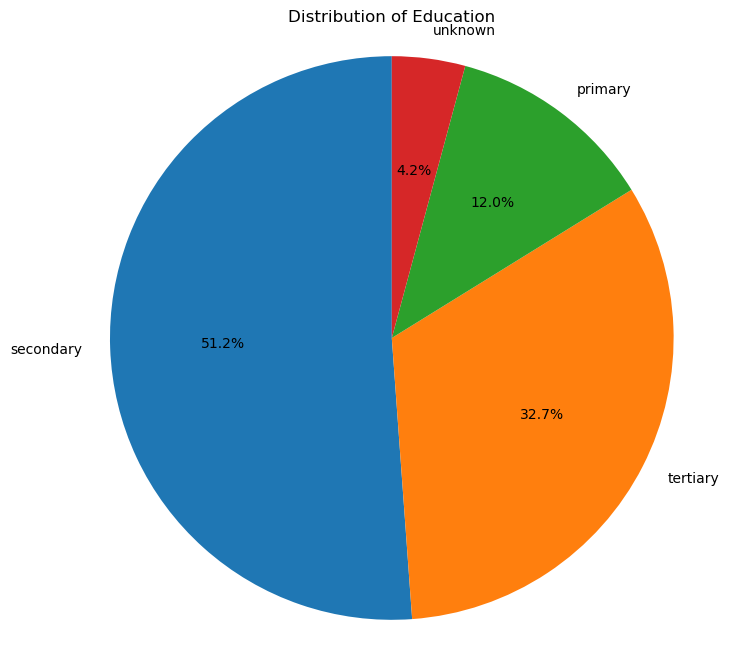

In [25]:
ed_counts = df['education'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(ed_counts, labels=ed_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Education')
plt.axis('equal')  
plt.show()

In [26]:
df["default"].value_counts()

default
no     4403
yes      27
Name: count, dtype: int64

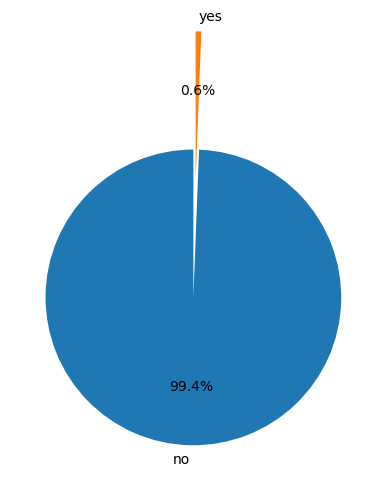

In [27]:
myexplode = [0.5, 0.3]
d=df["default"].value_counts()
plt.pie(d, labels=d.index, autopct='%1.1f%%', startangle=90,explode=myexplode)
plt.show()

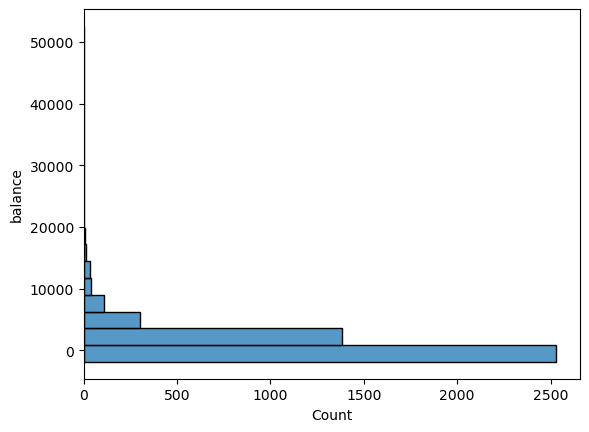

In [28]:
sns.histplot(data=df, y="balance",bins=20)
plt.show()

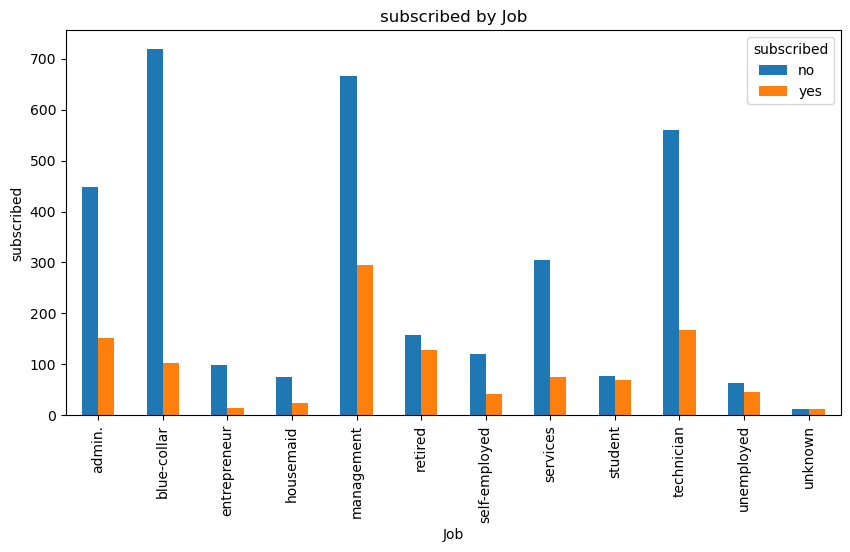

In [29]:
df.groupby(["job"])['subscribed'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("subscribed by Job")
plt.xlabel("Job")
plt.ylabel("subscribed")
plt.show()

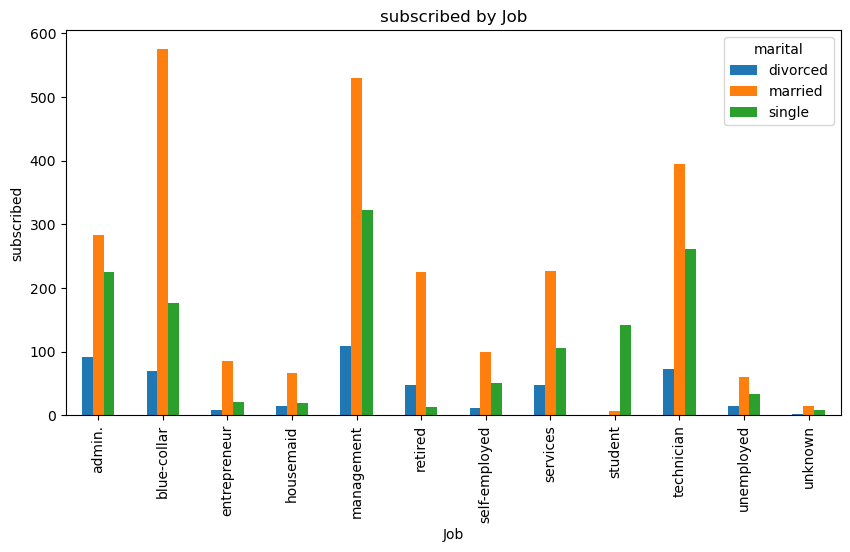

In [30]:
df.groupby(["job"])['marital'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("subscribed by Job")
plt.xlabel("Job")
plt.ylabel("subscribed")
plt.show()

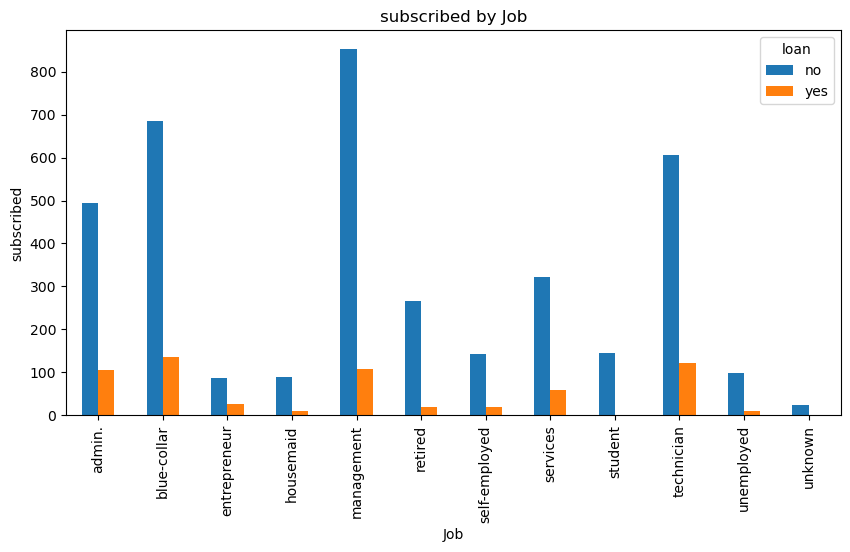

In [31]:
df.groupby(["job"])['loan'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("subscribed by Job")
plt.xlabel("Job")
plt.ylabel("subscribed")
plt.show()

In [32]:
df["housing"].value_counts()

housing
yes    2692
no     1738
Name: count, dtype: int64

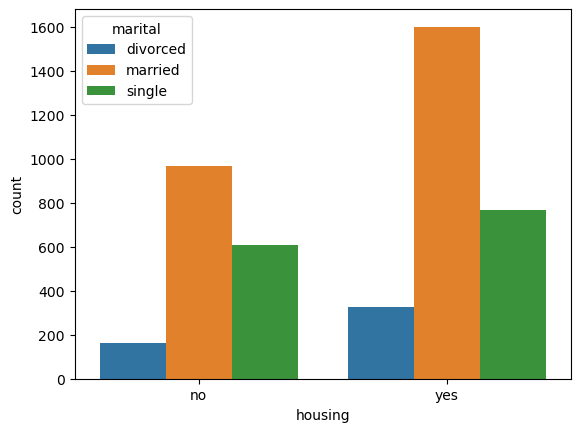

In [33]:
sns.countplot(x="housing",data=df,hue="marital")
plt.show()

In [34]:
df["contact"].value_counts()

contact
cellular     4082
telephone     317
unknown        31
Name: count, dtype: int64

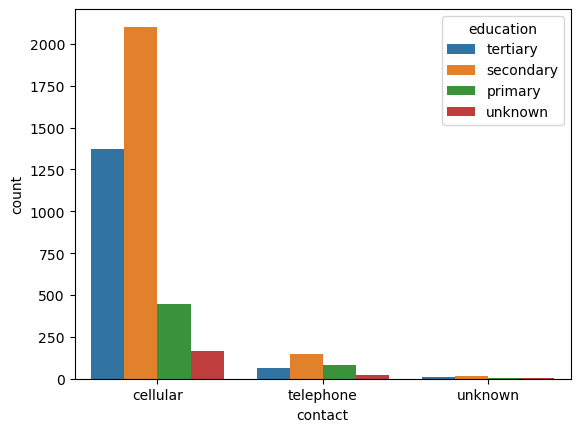

In [35]:
sns.countplot(x="contact",data=df,hue="education")
plt.show()

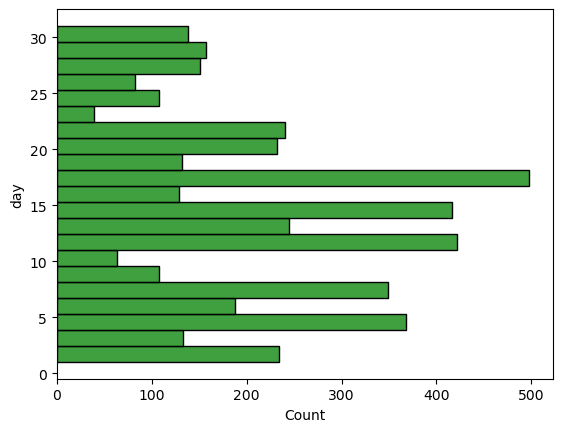

In [36]:
sns.histplot(data=df, y="day",color="green")
plt.show()

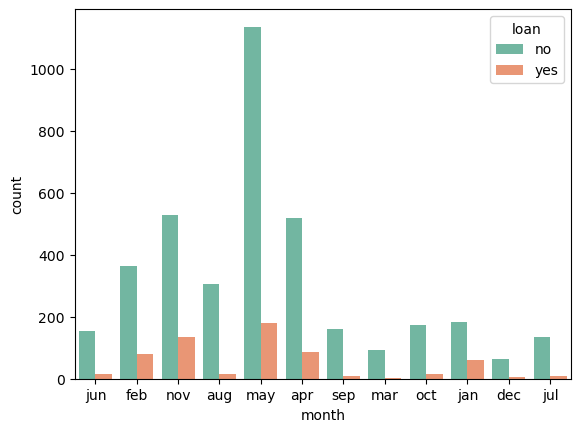

In [37]:
sns.countplot(x="month",data=df,hue="loan",palette="Set2")
plt.show()

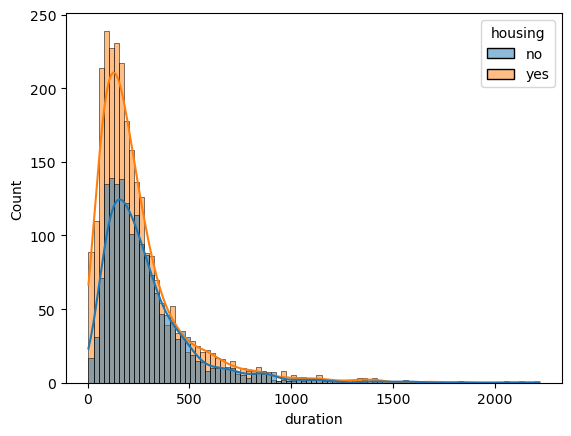

In [38]:
sns.histplot(data=df, x="duration",color="crimson",hue="housing",kde=True)
plt.show()

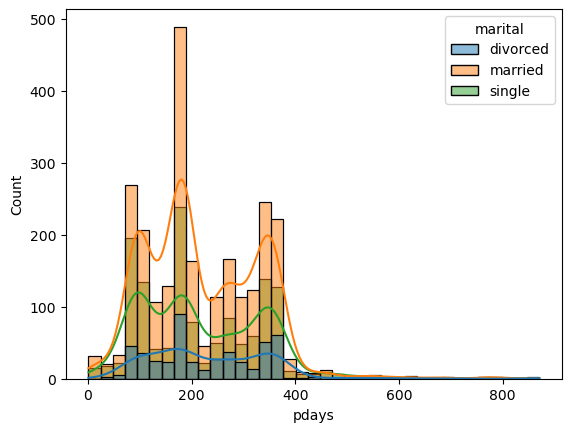

In [39]:
sns.histplot(data=df, x="pdays",color="purple",hue="marital",kde=True)
plt.show()

In [40]:
df["poutcome"].value_counts()

poutcome
failure    3362
success    1068
Name: count, dtype: int64

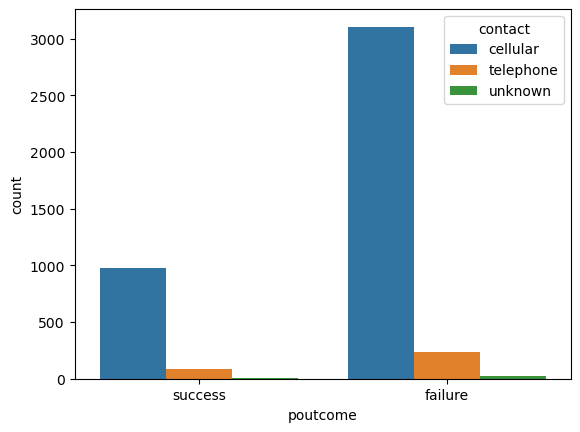

In [41]:
sns.countplot(x="poutcome",data=df,hue="contact")
plt.show()

In [42]:
df["subscribed"].value_counts()

subscribed
no     3305
yes    1125
Name: count, dtype: int64

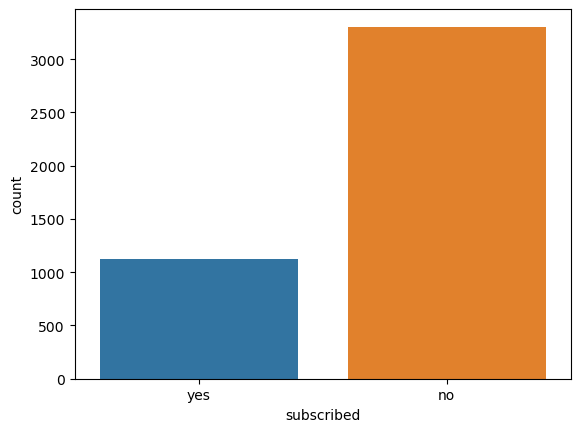

In [43]:
sns.countplot(x="subscribed",data=df)
plt.show()

In [50]:
cat_data=["job","marital","education","default","housing","loan","contact","month","poutcome"]
from sklearn.preprocessing import LabelEncoder
cat_data = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]


l = LabelEncoder()


for column in cat_data:
    df[column] = l.fit_transform(df[column])
df["subscribed"]=df["subscribed"].replace({"yes":1,"no":0})

In [54]:
col=["age","balance","day","month","duration","pdays"]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df[col]=sc.fit_transform(df[col])

In [56]:
X=df.drop(columns="subscribed",axis=1)
y=df["subscribed"]

In [59]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score, roc_curve

model= DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8171557562076749


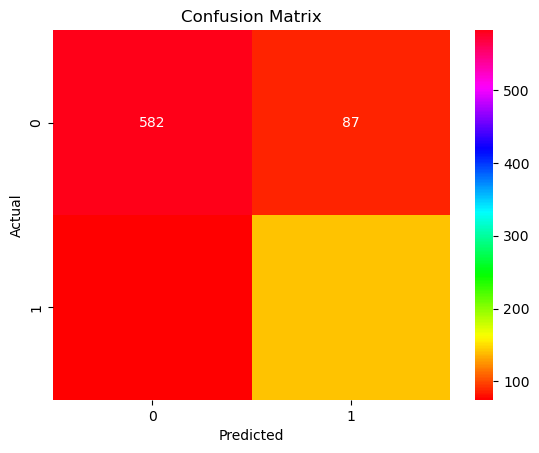

In [61]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt="d",cmap="hsv")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       669
           1       0.62      0.65      0.64       217

    accuracy                           0.82       886
   macro avg       0.75      0.76      0.76       886
weighted avg       0.82      0.82      0.82       886



In [63]:
roc_auc = roc_auc_score(y_test,y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7621665185675023


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn. linear_model import Ridge


In [ ]:
param={'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
     'solver':['auto','svd,', 'cholesky',' Isqr','sag', 'saga','lbfgs'],
     'positive':[False, True],
     'random_state':[1,4,10,20]
       
       
      }

gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(X_train,y_train)